[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/CosmiX-6/Deep-Learning-Squential-Model-for-Sentiment-Prediction/HEAD)

# **Sentiment Analysis - LSTM**

## Objective

The aim is to build a deep learning model using LSTM which can predict the sentiment from text. It will classify whether the text has positive/negative sentiment. We will make use of tensorflow, keras library for builidng this deeplearning model.

### Problem Statement

1. <a href="#ans1">Total number of positive and negative sentiments</a>
2. <a href="#ans2">Sequential LSTM model to predict positive and negative sentiments</a>
3. <a href="#ans3">Based on the model, check the sentiment for the following two sentences</a>

## **Data Description**

## *Sentiment data:*

The data ‘sentiment.csv’ contains all information about the tweet, but for this exercise, use the text and sentiment(only positive and negative sentiments) columns.

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np

import stopwords
import nltk
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Dataset

In [2]:
path = 'assets\\'
data = pd.read_csv(path+'Sentiment.csv', usecols=['text', 'sentiment']) # read the dataset file

# display the shape of dataframe
display(data.shape)

# displaying few records of the dataset
data.head()

(13871, 2)

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [3]:
data.shape

(13871, 2)

In [4]:
data.sentiment.value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

<div id="ans1" class="alert alert-success">

There are total <font color="red">**8493 samples of Negative Sentiment**</font> and <font color="green">**2236 samples of Positive Sentiment**</font>

</div>

#### There are 3142 neutral data in our dataset.

Classifying neutral data is out of scope from this sentiment analysis task.

Lets filter out the Positive and Negative class and create a new dataframe

In [5]:
# removing Neutral data
data = data[data['sentiment']!='Neutral']
data.head()

,sentiment,text
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
5,Positive,"RT @GregAbbott_TX: @TedCruz: ""On my first day ..."
6,Negative,RT @warriorwoman91: I liked her and was happy ...


**In below cell we have code to check if the sentiment data in dataframe is equally distributed or not.**<br>

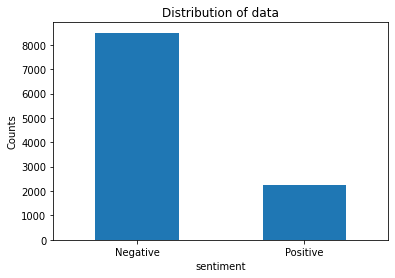

In [6]:
# plotting a barplot on count data to check data distribution
cp = data.groupby('sentiment').count().plot(kind='bar', legend=False)
plt.setp(cp, xlabel='sentiment', ylabel='Counts', title='Distribution of data')
plt.xticks(rotation=0)
plt.show()

Lets Check the frequency of word before text preprocessing.

In [7]:
def plot_Wordcloud(feature):
    '''
    A simple function to plot the wordcloud
    The function accepts the arrays of string data
    '''
    import wordcloud
    strings = ''
    for string in feature:
        word = string.split()
        strings += " ".join(word)+" "

    wordcloud = wordcloud.WordCloud().generate(strings)

    plt.imshow(wordcloud, interpolation='gaussian')
    plt.axis("off")
    plt.show()

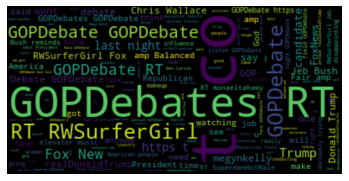

In [8]:
plot_Wordcloud(data.text)


### Text Preprocessing

In [9]:
# creating a word lemmatizer object
wordLemm = WordNetLemmatizer()

# creating a list of stopwords
stop = set(stopwords.get_stopwords('english'))
stop.update(set(nltk.corpus.stopwords.words('english')))
stopword = list(stop)

In [10]:
# below we have function to preprocess the text for further use i.e. to clean the text 
def pre_process(text):
    '''
    This function takes a string input and returns the string in lowercase with
    removal of username, no punctuation, eliminated stopwords.
    '''
    text = ' '.join([(''.join([char for char in word if char.isalpha() or char=='-' or char=='_' or char=='/' or char=='.'])) for word in text.lower().replace('\n', ' ').split() if not word.startswith('@') if not word.startswith('http') if word not in stopword])
    text = text.replace('-',' ')
    text = text.replace('_',' ')
    text = text.replace('/',' ')
    text = text.replace('.',' ')
    text = ' '.join([i for i in text.strip().split() if i not in stopword])
    clean_text = ''
    for word in text.split():
        if len(word)>2:
            word = wordLemm.lemmatize(word)
            clean_text += (word+' ')
    return clean_text.strip()

**Let's apply the function to clean the text**

In [11]:
import time

# recording time before preprocessing started
time_before = time.time()

# applying the preprocess function on 'text' column
data['processed_text'] = data.text.apply(pre_process)

# showing the amount of time taken in text preprocessing
print(f'Preprocessed in {time.time() - time_before:.0f} sec')

Preprocessed in 3 sec


In [12]:
data.processed_text.head()

1    catch full gopdebate last night scott best lin...
3    carly fiorina trending hour debate men complet...
4    gopdebate delivered highest rating history pre...
5    first day rescind every illegal executive acti...
6    liked happy heard going moderator anymore gopd...
Name: processed_text, dtype: object

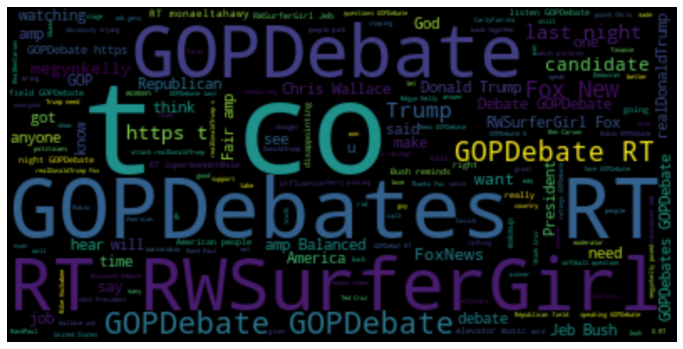

In [13]:
plt.figure(figsize=(12,7))

plot_Wordcloud(data.text)

With above image it can be seen that RT is appearing many time. We need to remove RT. (RT Retweets)

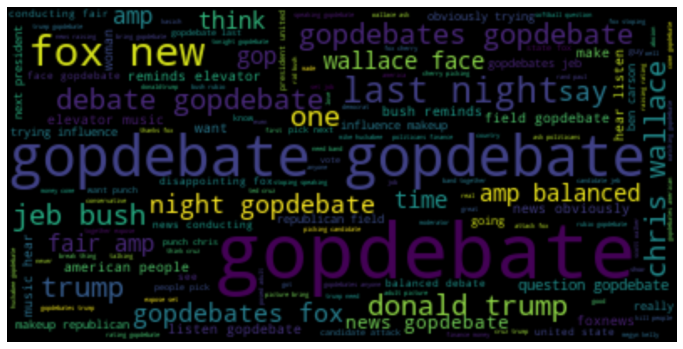

In [14]:
plt.figure(figsize=(12,7))
data['processed_text'] = data['processed_text'].apply(lambda x: x.replace('rt', ''))
plot_Wordcloud(data['processed_text'])

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# tokenizing text
tokenizer = Tokenizer(num_words=1500, split=' ')
tokenizer.fit_on_texts(data['processed_text'].values)

# generating train data
train_data = tokenizer.texts_to_sequences(data['processed_text'].values)
train_data = pad_sequences(train_data)

In [16]:
X_data = pd.DataFrame(train_data)
X_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,527,1,11,9,178,88,315,411,54
1,0,0,0,0,0,0,0,0,0,0,0,142,148,383,5,77,1,34
2,0,0,0,0,0,0,0,0,0,0,0,1,1177,112,500,93,5,3
3,0,0,0,0,0,0,0,0,0,151,207,183,295,963,1178,859,103,1
4,0,0,0,0,0,0,0,0,0,0,0,860,964,438,97,108,611,1


In [17]:
# y_data = np.where(data['sentiment']=='Negative', 0, 1)

y_data = pd.get_dummies(data['sentiment']).values
y_data[:5]

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0]], dtype=uint8)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.20, random_state = 50)
display(X_train.shape, y_train.shape)
display(X_test.shape, y_test.shape)

(8583, 18)

(8583, 2)

(2146, 18)

(2146, 2)

## Data Modelling

<div id="ans2"></div>

### LSTM Model

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

model = Sequential()

model.add(Embedding(1500, 128, input_length= X_train.shape[1]))
model.add(LSTM(200))
model.add(Dense(2, activation= 'softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 18, 128)           192000    
_________________________________________________________________
lstm (LSTM)                  (None, 200)               263200    
_________________________________________________________________
dense (Dense)                (None, 2)                 402       
Total params: 455,602
Trainable params: 455,602
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
model.fit(X_train, y_train, epochs=10, verbose = 'auto')

Epoch 1/10
269/269 [==============================] - 9s 27ms/step - loss: 0.4103 - accuracy: 0.8276
Epoch 2/10
269/269 [==============================] - 7s 26ms/step - loss: 0.3138 - accuracy: 0.8661
Epoch 3/10
269/269 [==============================] - 7s 26ms/step - loss: 0.2836 - accuracy: 0.8801
Epoch 4/10
269/269 [==============================] - 8s 28ms/step - loss: 0.2565 - accuracy: 0.8889
Epoch 5/10
269/269 [==============================] - 8s 28ms/step - loss: 0.2310 - accuracy: 0.8989 0s - loss: 0.2301 - ac
Epoch 6/10
269/269 [==============================] - 7s 28ms/step - loss: 0.2105 - accuracy: 0.9087
Epoch 7/10
269/269 [==============================] - 7s 27ms/step - loss: 0.1901 - accuracy: 0.9151
Epoch 8/10
269/269 [==============================] - 7s 26ms/step - loss: 0.1657 - accuracy: 0.9294
Epoch 9/10
269/269 [==============================] - 7s 27ms/step - loss: 0.1530 - accuracy: 0.9344
Epoch 10/10
269/269 [==============================] - 7s 25ms/step 

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 18, 128)           192000    
_________________________________________________________________
lstm (LSTM)                  (None, 200)               263200    
_________________________________________________________________
dense (Dense)                (None, 2)                 402       
Total params: 455,602
Trainable params: 455,602
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.evaluate(X_test, y_test)

68/68 [==============================] - 1s 8ms/step - loss: 0.8411 - accuracy: 0.8122


[0.8411303162574768, 0.8122087717056274]

<div class="alert alert-success">

#### The model accuracy on test data can be seen around 82.25%

</div>

Writing a function which will be able to classify the sentiment for the requested text.

In [24]:
def sentiment_analyzer(query):
    '''
    Inputs variable:
    query : Accepts string format data.
    returns sentiment sentiment for the input query
    '''
    temp = query
    query = pre_process(query)
    
    query = tokenizer.texts_to_sequences([query])
    query = pad_sequences(query, maxlen=18)
    
    result = model.predict(query)[0]
    
    if (np.argmax(result) == 0):
        return "Negative"
    return "Positive"

<div id="ans3"></div>

## Sentiment Prediction

In [25]:
query1 = "He is a great leader."
query2 = "He is a terrible leader."

print(query1, '<<', sentiment_analyzer(query1))
print(query2, '<<', sentiment_analyzer(query2))

He is a great leader. << Positive
He is a terrible leader. << Negative


## Conclusion_

The aim to classify the text sentiment using LSTM was successfully achieved, with the accuracy of ~80%

<h3>Author</h3>
<h4>Akash Sharma</h4>
<div style="float:left">
  <a href="https://www.linkedin.com/in/akash-sharma-01775b14a">
    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white" alt="LinkedIn">
  </a>
  <a href="https://discord.com/users/366283102462541865">
    <img src="https://img.shields.io/badge/Discord-7289DA?style=for-the-badge&logo=discord&logoColor=white" alt="Discord">
  </a>
  <a href="https://github.com/CosmiX-6">
    <img src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white" alt="GitHub">
  </a>
</div>